# 1. JOURNEY DATA
link: https://cycling.data.tfl.gov.uk

In [1]:
import pandas as pd
import requests
import io
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

## a. import journey cycle data

In [2]:
# Define a function to rename columns

def rename_columns(df):
    column_names = {
        'End Station Id': 'EndStation Id',
        'End station number': 'EndStation Id',
        'Start Station Id': 'StartStation Id',
        'Start station number': 'StartStation Id',
        'End Station Name': 'EndStation Name',
        'End station': 'EndStation Name',
        'Start Station Name': 'StartStation Name',
        'Start station': 'StartStation Name',
        'Start date': 'Start Date',
        'End Date': 'End Date',
        'End date': 'End Date',
        'Number': 'Rental Id',
    }
    
    for old_name, new_name in column_names.items():
            if old_name in df.columns:
                df = df.rename(columns={old_name: new_name})
                if new_name in ['EndStation Id', 'StartStation Id', 'Rental Id']:
                    df[new_name] = pd.to_numeric(df[new_name], errors='coerce', downcast='integer')
                elif new_name in ['Start Date', 'End Date']:
                    df[new_name] = pd.to_datetime(df[new_name], infer_datetime_format=True)
    
    return df


# read the list of file names
filenames = pd.read_csv('/Users/tabea/Documents/UrbanMobility/filenames-data.csv', header=None, squeeze=True)

# combine base-url and filenames
base_url = 'http://cycling.data.tfl.gov.uk/usage-stats/'
url_list = (base_url + urllib.parse.quote(x) for x in filenames)
unused_cols = ['Total duration (ms)', 'Total duration', 'Duration', 'Duration_Seconds', 'Bike Id', 'Bike number', 'Bike model']

# loop over the urls and extract the data
temp_dfs = []
for url in url_list:
    response = requests.get(url, verify=False, timeout=(3, 7))

    if url.endswith('.csv'):
        temp_df = pd.read_csv(io.StringIO(response.content.decode('utf-8')), usecols=lambda col: col not in unused_cols)

    elif url.endswith('.xlsx'):
        temp_df = pd.read_excel(io.BytesIO(response.content), usecols=lambda col: col not in unused_cols)

    temp_df = rename_columns(temp_df)
    temp_dfs.append(temp_df)

# concatenate the new data to the existing data
merged_df = pd.concat(temp_dfs, ignore_index=True)


/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cycling.data.tfl.gov.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn

In [12]:
# total amount of entries: 84'188'068
len(merged_df)

84188068

In [13]:
merged_df.to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_raw.csv')

In [63]:
len(merged_df)

83725067

### import data

In [41]:
# import
merged_df = pd.read_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_raw.csv')

In [42]:
merged_df.head(30)

,Unnamed: 0,Unnamed: 0.1,Rental Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Unnamed: 9,Unnamed: 10,Unnamed: 11,EndStation Logical Terminal,endStationPriority_id,StartStation Logical Terminal
0,0,0,63097899.0,2017-03-15 00:06:00,631.0,"Battersea Park Road, Nine Elms",2017-03-15 00:00:00,74.0,"Vauxhall Cross, Vauxhall",NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,63097900.0,2017-03-15 00:05:00,397.0,"Devonshire Terrace, Bayswater",2017-03-15 00:01:00,410.0,"Edgware Road Station, Marylebone",NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,63097901.0,2017-03-15 00:06:00,426.0,"Vincent Street, Pimlico",2017-03-15 00:01:00,177.0,"Ashley Place, Victoria",NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,63097902.0,2017-03-15 00:12:00,462.0,"Bonny Street, Camden Town",2017-03-15 00:01:00,22.0,"Northington Street , Holborn",NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,63097903.0,2017-03-15 00:05:00,423.0,"Eaton Square (South), Belgravia",2017-03-15 00:01:00,143.0,"Pont Street, Knightsbridge",NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,63097904.0,2017-03-15 00:15:00,761.0,"Humbolt Road, Fulham",2017-03-15 00:02:00,266.0,"Queen's Gate (North), Kensington",NaN,NaN,NaN,NaN,NaN,NaN
6,6,6,63097905.0,2017-03-15 00:12:00,501.0,"Cephas Street, Bethnal Green",2017-03-15 00:02:00,217.0,"Wormwood Street, Liverpool Street",NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,63097906.0,2017-03-15 00:07:00,297.0,"Geraldine Street, Elephant & Castle",2017-03-15 00:02:00,815.0,"Lambeth Palace Road, Waterloo",NaN,NaN,NaN,NaN,NaN,NaN
8,8,8,63097907.0,2017-03-15 00:14:00,155.0,"Lexham Gardens, Kensington",2017-03-15 00:02:00,378.0,"Natural History Museum, South Kensington",NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,63097908.0,2017-03-15 00:09:00,710.0,"Albert Bridge Road, Battersea Park",2017-03-15 00:02:00,172.0,"Sumner Place, South Kensington",NaN,NaN,NaN,NaN,NaN,NaN


## b. clean data

In [43]:
print("length before cleaning:", len(merged_df))

length before cleaning: 84188068


### drop columns starting with 'Unnamed'

In [53]:
merged_df = merged_df.filter(regex='^(?!Unnamed)')

### drop rows with nan values only

In [54]:
# drop rows with NaN values only
merged_df = merged_df.dropna(how='all')

### investigate duplicates

In [49]:
# check for duplicated rental Id: 585411
# some files have same or overlapping content, but different names. e.g: 01b Journey Data Extract 24Jan16-06Feb16.csv, 01bJourneyDataExtract24Jan16-06Feb16.csv

duplicates_rental_id = merged_df[merged_df['Rental Id'].duplicated(keep=False)]
print(len(duplicates_rental_id))
duplicates.to_csv('/Users/tabea/Documents/UrbanMobility/data/duplicates.csv')

585411


### drop duplicates

In [50]:
merged_df = merged_df.drop_duplicates(subset='Rental Id', keep='first')
print(len(merged_df))

(83895357, 15)


### investigation nan values

In [55]:
# cols without NaNs

print("Rental Id NaNs: ", len(merged_df[merged_df["Rental Id"].isna()]))
print("StartStation Name NaNs: ", len(merged_df[merged_df["StartStation Name"].isna()]))
print("Start Date NaNs: ", len(merged_df[merged_df["Start Date"].isna()]))

Rental Id NaNs:  0
StartStation Name NaNs:  0
Start Date NaNs:  0


In [56]:
# StartStation Id: 234'440 NaN -> but most StartStation Names are known

StartStationId_NAN = merged_df[merged_df["StartStation Id"].isna()]
print("StartStation Id NaNs: ", len(StartStationId_NAN))
StartStationId_NAN.to_csv('/Users/tabea/Documents/UrbanMobility/data/StartStationId_NAN.csv')

StartStation Id NaNs:  234440


In [57]:
# EndStation Id: 715'522 NaN -> but most EndStation Names are known

EndStationId_NAN = merged_df[merged_df["EndStation Id"].isna()]
print("EndStation Id NaNs: ", len(EndStationId_NAN))
EndStationId_NAN.to_csv('/Users/tabea/Documents/UrbanMobility/data/EndStationId_NAN.csv')

EndStation Id NaNs:  715522


In [58]:
# EndStation Name: 171'824 NaN -> if empty, EndStation Id and End Station Date is also missing

EndStationName_NAN = merged_df[merged_df["EndStation Name"].isna()]
print("EndStation Name NaNs: ", len(EndStationName_NAN))
EndStationName_NAN.to_csv('/Users/tabea/Documents/UrbanMobility/data/EndStationName_NAN.csv')

EndStation Name NaNs:  171824


In [59]:
# End Date: 170'358 NaN -> if empty, EndStation Id and End Station Name is also missing

EndDate_NAN = merged_df[merged_df["End Date"].isna()]
print("End Date NaNs: ", len(EndDate_NAN))
EndDate_NAN.to_csv('/Users/tabea/Documents/UrbanMobility/data/EndDate_NAN.csv')

End Date NaNs:  170358


In [60]:
# bike station ID: id's are not consistent: only 852 station are present in the data. But there is also a terminal station that have higher values and are mixed in the data. They can be found here: https://api.tfl.gov.uk/BikePoint/
# they appear when the start date is at day x (e.g. 23:59) and the end date is at day x+1 (e.g. 00:05)
greater_than_852 = (merged_df['StartStation Id'] > 852) | (merged_df['EndStation Id'] > 852)

# display the boolean Series
print(greater_than_852.sum())

# print rows
selected_rows = merged_df[greater_than_852]
print(selected_rows.head(50))

2788522
            Rental Id             End Date  EndStation Id  \
62864423  125230172.0  2022-09-19 02:11:00       200222.0   
62864424  125230173.0  2022-09-19 00:11:00         1194.0   
62864425  125230174.0  2022-09-19 00:14:00       300019.0   
62864426  125230175.0  2022-09-19 00:23:00       300252.0   
62864427  125230176.0  2022-09-19 00:23:00       300252.0   
62864428  125230177.0  2022-09-19 00:13:00       300015.0   
62864429  125230165.0  2022-09-19 00:09:00          994.0   
62864430  125230166.0  2022-09-19 02:14:00       200054.0   
62864431  125230167.0  2022-09-19 00:09:00          994.0   
62864432  125230168.0  2022-09-19 00:21:00       200033.0   
62864433  125230169.0  2022-09-19 00:16:00         2701.0   
62864434  125230170.0  2022-09-19 00:14:00         1171.0   
62864435  125230171.0  2022-09-19 02:11:00       200222.0   
62864436  125230157.0  2022-09-19 00:14:00         3480.0   
62864437  125230158.0  2022-09-19 00:02:00       200124.0   
62864438  125230

### drop nan

In [64]:
# drop if EndStation Id AND EndStation Name AND End Date is missing

merged_df = merged_df.dropna(subset=['EndStation Id', 'EndStation Name', 'End Date'], how='all')
print(merged_df.shape)
print(merged_df.isna().sum())

KeyboardInterrupt: 

### fill missing values

In [66]:
# fill EndStation Ids and StartStation Id's based on it's station name

def get_station_id_from_name(name):
    station = bike_locs[bike_locs['name'] == name]
    if station.empty:
        return None
    else:
        return station.iloc[0]['id']

# Replace missing StartStation Id with the corresponding ID
merged_df.loc[merged_df['StartStation Id'].isnull() & merged_df['StartStation Name'].notnull(), 'StartStation Id'] = merged_df['StartStation Name'].apply(get_station_id_from_name)

# Replace missing EndStation Id with the corresponding ID
merged_df.loc[merged_df['EndStation Id'].isnull() & merged_df['EndStation Name'].notnull(), 'EndStation Id'] = merged_df['EndStation Name'].apply(get_station_id_from_name)


KeyboardInterrupt: 

In [ ]:
print(merged_df.isna().sum())

# EndStation Id: before: 715'522 NaN, now: 
EndStationId_NAN = merged_df[merged_df["EndStation Id"].isna()]
print("EndStation Id NaNs: ", len(EndStationId_NAN))
EndStationId_NAN.to_csv('/Users/tabea/Documents/UrbanMobility/data/EndStationId_NAN.csv')

In [ ]:
# get bike station id, if logical terminal id is present

def get_station_id_from_terminalId(tid):
    station = bike_locs[bike_locs['terminalId'] == tid]
    if station.empty:
        return None
    else:
        return station.iloc[0]['id']
    
# if EndStation Id is nan but presend in merged_df["EndStation Logical Terminal"] -> replace missing EndStation Id
merged_df['EndStation Id'] = merged_df['EndStation Id'].fillna(merged_df['EndStation Logical Terminal'].apply(get_station_id_from_terminalId))
merged_df['StartStation Id'] = merged_df['StartStation Id'].fillna(merged_df['StartStation Logical Terminal'].apply(get_station_id_from_terminalId))

# replace logical terminal IDs with normal IDs -> if station id > 852: the logical terminal ID is used
merged_df.loc[merged_df['EndStation Id'] > 852, 'EndStation Id'] = merged_df.loc[merged_df['EndStation Id'] > 852, 'EndStation Id'].apply(get_station_id_from_terminalId)
merged_df.loc[merged_df['StartStation Id'] > 852, 'StartStation Id'] = merged_df.loc[merged_df['StartStation Id'] > 852, 'StartStation Id'].apply(get_station_id_from_terminalId)

### drop unused cols

In [ ]:
merged_df.drop(merged_df.iloc[:,7:], axis=1, inplace=True)
merged_df.head()

### change dtypes

In [ ]:
print(merged_df.dtypes)

merged_df["EndStation Id"] = merged_df["EndStation Id"].astype(int)
merged_df["Rental Id"] = merged_df["Rental Id"].astype(int)
merged_df["Start Date"] = pd.to_datetime(merged_df["Start Date"])

print(merged_df.dtypes)

In [ ]:
print("length after cleaning:", len(merged_df))

In [ ]:
merged_df.to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_cleaned.csv')

## c. split data by year

In [ ]:
# Split merged_df by year
groups = merged_df.groupby(pd.Grouper(key='Start Date', freq='Y'))

# Create a new DataFrame for each year
yearly_dfs = {}
for year, group in groups:
    yearly_dfs[year.year] = group.reset_index(drop=True)

In [ ]:
# plot length of all dataframes

length_of_dfs = [len(yearly_dfs[2015]), len(yearly_dfs[2016]), len(yearly_dfs[2017]), len(yearly_dfs[2018]), len(yearly_dfs[2019]), len(yearly_dfs[2020]), len(yearly_dfs[2021]), len(yearly_dfs[2022])]
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

sns.set_style("whitegrid")
sns.set_palette("Blues")

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=years, y=length_of_dfs, ax=ax, color="royalblue")
plt.xlabel("Year")
plt.ylabel("Total Entries")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f"{int(p.get_height())}", 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

### save data as csv

In [ ]:
yearly_dfs[2015].to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_2015.csv')
yearly_dfs[2016].to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_2016.csv')
yearly_dfs[2017].to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_2017.csv')
yearly_dfs[2018].to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_2018.csv')
yearly_dfs[2019].to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_2019.csv')
yearly_dfs[2020].to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_2020.csv')
yearly_dfs[2021].to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_2021.csv')
yearly_dfs[2022].to_csv('/Users/tabea/Documents/UrbanMobility/data/journey_data_2022.csv')

# 2. BIKE STATION LOCATIONS

In [134]:
import requests
import json
import pandas as pd

url = "https://api.tfl.gov.uk/BikePoint/"
response = requests.get(url)
root = json.loads(response.text)

data = []
logical_id = ""
for station in root:
    for prop in station['additionalProperties']:
        if prop['key'] == 'TerminalName':
            logical_id = prop['value']
            break

    station_data = {
        "id": station['id'][11:],
        "name": station['commonName'],
        "lat": station['lat'],
        "lon": station['lon'],
        "terminalId": logical_id
    }
    data.append(station_data)

bike_locs = pd.DataFrame(data)

print(bike_locs.shape)
bike_locs.head(10)

(797, 5)


,id,name,lat,lon,terminalId
0,1,"River Street , Clerkenwell",51.529163,-0.109970,001023
1,2,"Phillimore Gardens, Kensington",51.499606,-0.197574,001018
2,3,"Christopher Street, Liverpool Street",51.521283,-0.084605,001012
3,4,"St. Chad's Street, King's Cross",51.530059,-0.120973,001013
4,5,"Sedding Street, Sloane Square",51.493130,-0.156876,003420
5,6,"Broadcasting House, Marylebone",51.518117,-0.144228,003424
6,7,"Charlbert Street, St. John's Wood",51.534300,-0.168074,003422
7,8,"Maida Vale, Maida Vale",51.529857,-0.183486,003423
8,9,"New Globe Walk, Bankside",51.507385,-0.096440,001015
9,10,"Park Street, Bankside",51.505974,-0.092754,001024


### visualize the bike locations

In [135]:
import folium

# create a map centered on London
london_coords = (51.5074, -0.1278)
base_map1 = folium.Map(location=london_coords, zoom_start=11, tiles='Stamen Toner')

# add markers for each bike station location
for index, row in bike_locs.iterrows():
    popup_text = f"{row['name']} (id: {row['id']}) (terminal id: {row['terminalId']})"
    marker = folium.Marker(location=(row['lat'], row['lon']), popup=popup_text)
    marker.add_to(base_map1)

# add a heatmap layer
heat_data = [[row['lat'], row['lon']] for index, row in bike_locs.iterrows()]
heatmap = folium.FeatureGroup(heat_data)
heatmap.add_to(base_map1)

# save the map as an HTML file
base_map1.save('map_bike_loc.html')

In [136]:
from IPython.display import IFrame

IFrame('map_bike_loc.html', width=900, height=500)

# 3. ADD LONDON BOROUGH DATA

In [175]:
# borough data from Office for National Statistics: https://findthatpostcode.uk/points/51.529163,%20-0.10997

def get_borough(lat, lon):
    url = f'https://findthatpostcode.uk/points/{lat},{lon}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        borough = data['included'][0]['attributes']['cty_name']
        return borough
    else:
        return 'no borough'

bike_locs['borough'] = bike_locs.apply(lambda row: get_borough(row['lat'], row['lon']), axis=1)

KeyboardInterrupt: 

In [176]:
print(bike_locs.shape)
bike_locs.head(10)

(797, 6)


,id,name,lat,lon,terminalId,borough
0,1,"River Street , Clerkenwell",51.529163,-0.109970,001023,Islington
1,2,"Phillimore Gardens, Kensington",51.499606,-0.197574,001018,Kensington and Chelsea
2,3,"Christopher Street, Liverpool Street",51.521283,-0.084605,001012,Hackney
3,4,"St. Chad's Street, King's Cross",51.530059,-0.120973,001013,Camden
4,5,"Sedding Street, Sloane Square",51.493130,-0.156876,003420,Kensington and Chelsea
5,6,"Broadcasting House, Marylebone",51.518117,-0.144228,003424,Westminster
6,7,"Charlbert Street, St. John's Wood",51.534300,-0.168074,003422,Westminster
7,8,"Maida Vale, Maida Vale",51.529857,-0.183486,003423,Westminster
8,9,"New Globe Walk, Bankside",51.507385,-0.096440,001015,Southwark
9,10,"Park Street, Bankside",51.505974,-0.092754,001024,Southwark


In [139]:
# display the borough names
boroughs = bike_locs['borough'].unique()

for borough in boroughs:
    print(borough)

Islington
Kensington and Chelsea
Hackney
Camden
Westminster
Southwark
City of London
Tower Hamlets
Lambeth
Wandsworth
Hammersmith and Fulham
Newham


In [140]:
bike_locs.to_csv('/Users/tabea/Documents/UrbanMobility/data/bike_locations.csv', header=True, index=None)

### bar chart - visualize the bike location counts by borough

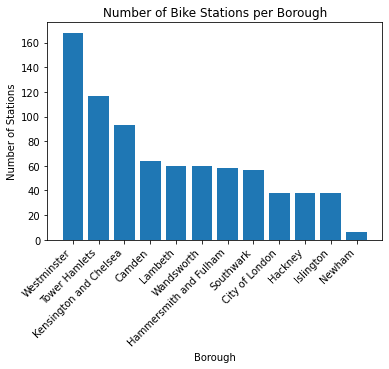

In [141]:
# Create a bar chart with the number of stations per borough
borough_counts = bike_locs.groupby('borough').size()
borough_counts = borough_counts.sort_values(ascending=False)

# Set up the bar chart
fig, ax = plt.subplots()
ax.bar(borough_counts.index, borough_counts.values)

# Customize the chart
ax.set_title('Number of Bike Stations per Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')

plt.show()

### marker map - visualize the bike location counts by borough

In [203]:
import random
import branca.colormap as cm

# create a map centered on London
london_coords = (51.5074, -0.1278)
base_map3 = folium.Map(location=london_coords, zoom_start=12, tiles='Stamen Toner')


# define a dictionary that maps borough names to random colors
boroughs = sorted(bike_locs['borough'].unique())
colors = {}
for borough in boroughs:
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    colors[borough] = f"#{r:02x}{g:02x}{b:02x}"

# add markers for each bike location, colored based on the borough
for index, row in bike_locs.iterrows():
    popup_text = f"{row['name']} (borough: {row['borough']}))"
    marker = folium.CircleMarker(location=(row['lat'], row['lon']), radius=5, popup=popup_text, fill=True, color=colors[row['borough']], fill_opacity=0.7)
    marker.add_to(base_map3)
    
# save the map as an HTML file
base_map3.save('map_bike_loc_borough_marker.html')

In [204]:
from IPython.display import IFrame

IFrame('map_bike_loc_borough_marker.html', width=900, height=500)

### heat map - visualize the bike location counts by borough

In [230]:
import folium
from folium.plugins import HeatMap

# group the data by borough and count the number of bike locations in each borough
borough_counts = bike_locs.groupby('borough').size()

# create a map centered on London
london_coords = (51.5074, -0.1278)
base_map2 = folium.Map(location=london_coords, zoom_start=12, tiles='Stamen Toner')

# create a heatmap layer with the bike location counts for each borough
heatmap_layer = HeatMap(
    list(zip(bike_locs['lat'], bike_locs['lon'], borough_counts)),
    name='Bike Locations',
    min_opacity=0.4,
    max_val=max(borough_counts),
    radius=40,
    blur=10,
    max_zoom=1,
)

# add a heatmap layer
heatmap_layer.add_to(base_map2)

# save the map as an HTML file
base_map2.save('map_bike_loc_borough_heatmap.html')

/var/folders/7k/528cxkys5vv34d3vcx99jrwh0000gn/T/ipykernel_61773/4143128245.py:12: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(


In [231]:
from IPython.display import IFrame

IFrame('map_bike_loc_borough_heatmap.html', width=900, height=500)

In [243]:
import folium
import geopandas as gpd
from folium.plugins import HeatMap

# read the GeoJSON data for London borough boundaries
boroughs_geojson = gpd.read_file('https://skgrange.github.io/www/data/london_boroughs.json')

# define a dictionary that maps borough names to random colors
boroughs = sorted(bike_locs['borough'].unique())
colors = {}
for borough in boroughs:
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    colors[borough] = f"#{r:02x}{g:02x}{b:02x}"
    
default_color = '#999999'

def style_function(feature):
    borough_name = feature['properties']['name']
    if borough_name in colors:
        fill_color = colors[borough_name]
    else:
        fill_color = default_color
    return {
        'fillColor': fill_color,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    }

    
# create a map centered on London
london_coords = (51.5074, -0.1278)
base_map = folium.Map(location=london_coords, zoom_start=10, tiles='Stamen Toner')

# add the borough boundaries to the map
folium.GeoJson(boroughs_geojson, name='geojson', style_function=style_function).add_to(base_map)

# save the map as an HTML file
base_map.save('london_boroughs_map.html')

In [244]:
from IPython.display import IFrame

IFrame('london_boroughs_map.html', width=900, height=500)

# 4. Feature Engineering

In [ ]:
# TODO: add more data :)